In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
iris_data= pd.read_csv('iris.data.txt', header=None, names=cols)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dict={"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2}
iris_data['flower']=iris_data['flower'].apply(lambda x:dict[x])

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


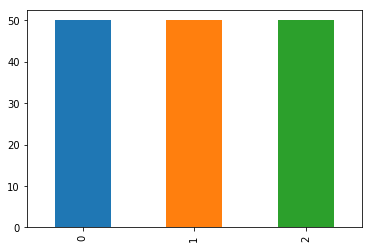

In [5]:
iris_data['flower'].value_counts().sort_index().plot.bar()

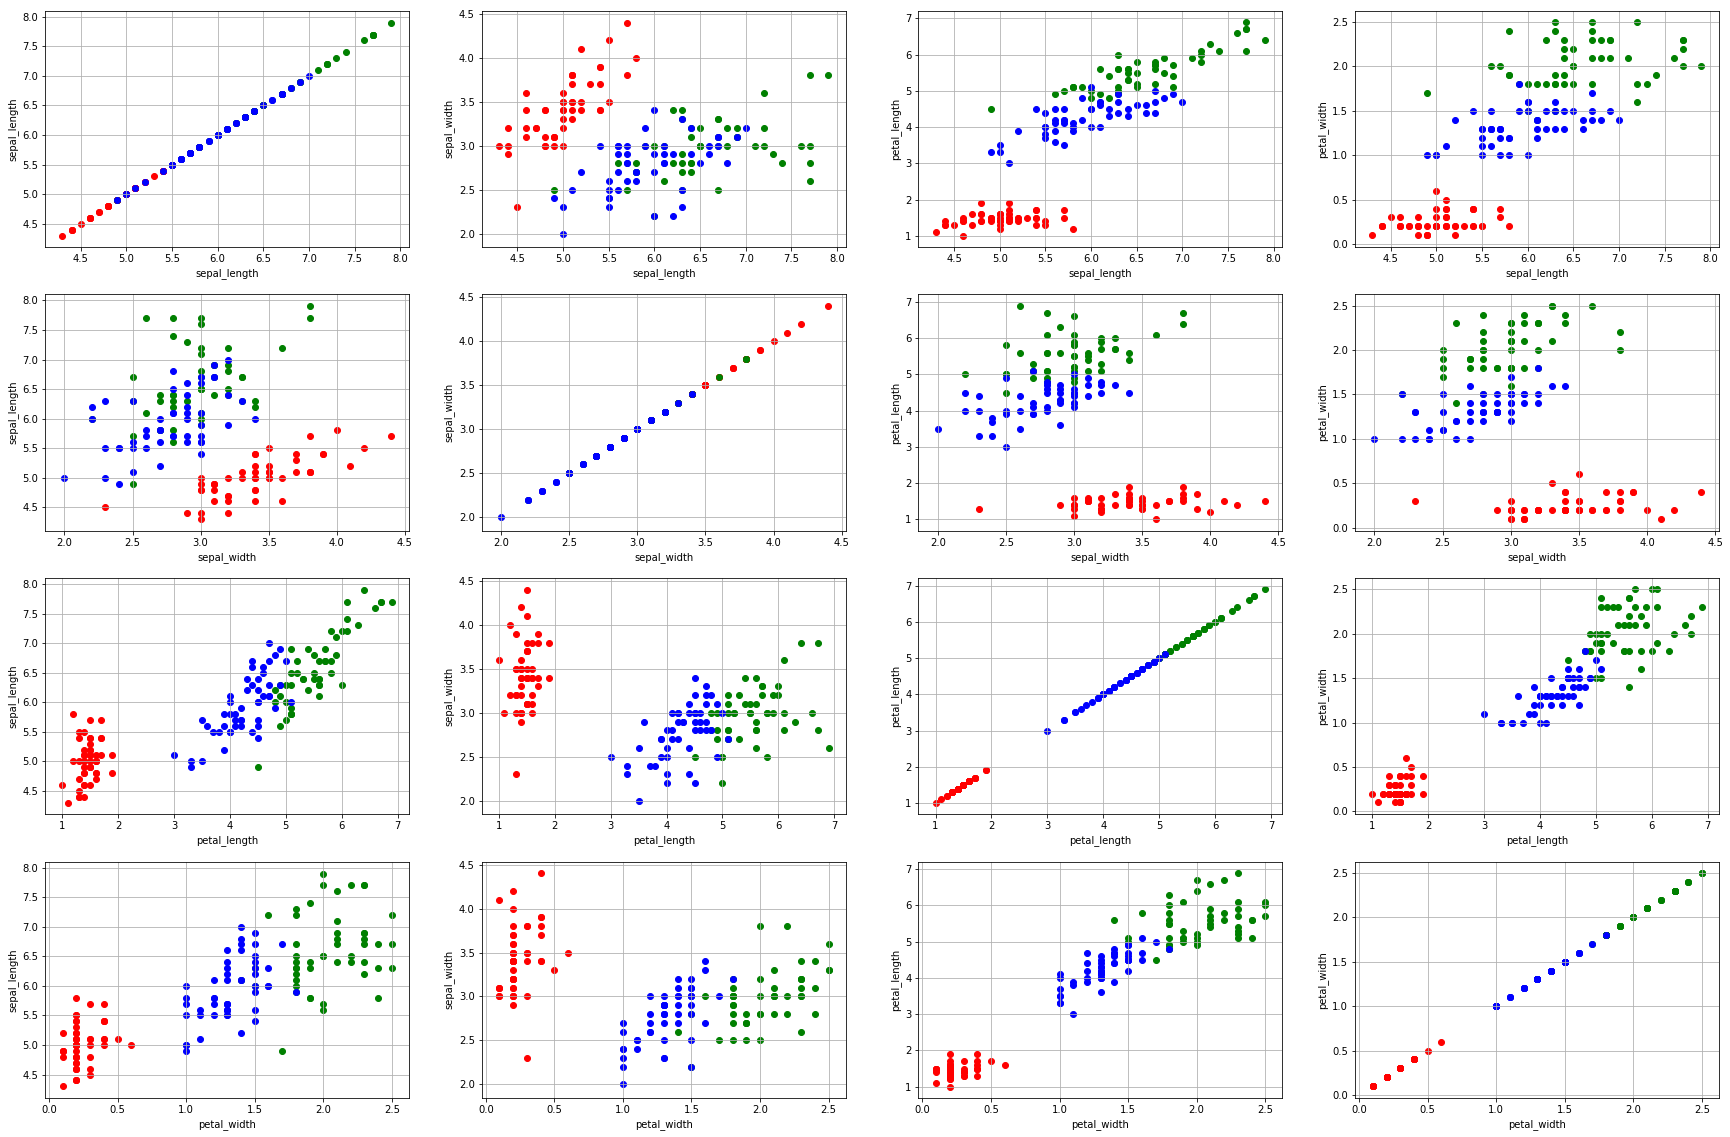

In [6]:
iris_setosa = iris_data[iris_data['flower']==0]
iris_virginica = iris_data[iris_data['flower']==1]
iris_versicolor = iris_data[iris_data['flower']==2]

plt.figure(figsize=(30,20))
for i in range(0,4):
    for j in range(0,4):
        plt.subplot(4,4,i*4+j+1)
        plt.scatter(iris_setosa[cols[i]],iris_setosa[cols[j]],color='r')
        plt.scatter(iris_virginica[cols[i]],iris_virginica[cols[j]],color='g')
        plt.scatter(iris_versicolor[cols[i]],iris_versicolor[cols[j]],color='b')
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.grid(True)


In [7]:
x=iris_data[['petal_length', 'petal_width']]
y=iris_data['flower']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9032)

In [8]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(x_train,y_train)

print("Extracted Classes",decisiontree.classes_)

Extracted Classes [0 1 2]


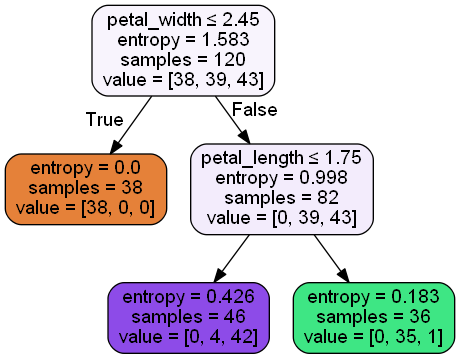

In [9]:
from io import StringIO
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
from sklearn.tree import export_graphviz #import software
import pydotplus # convert into dot file
from IPython.display import Image # to display image in ouput from dot file

DecisionTreeImg=StringIO() # creates file in memory(RAM)

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,
                feature_names=["petal_width","petal_length"],special_characters=True)# creates a dot file
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

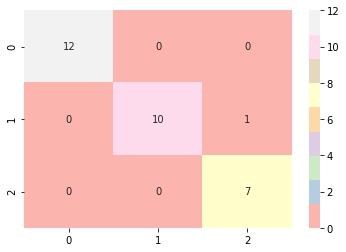

In [10]:
import seaborn
Predicted_Species=obtained_tree.predict(x_test)
seaborn.heatmap(confusion_matrix(y_test,Predicted_Species),annot=True,cmap="Pastel1",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

[[0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 ...
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]]
[[-0.5  -0.5  -0.5  ... -0.5  -0.5  -0.5 ]
 [-0.49 -0.49 -0.49 ... -0.49 -0.49 -0.49]
 [-0.48 -0.48 -0.48 ... -0.48 -0.48 -0.48]
 ...
 [ 2.97  2.97  2.97 ...  2.97  2.97  2.97]
 [ 2.98  2.98  2.98 ...  2.98  2.98  2.98]
 [ 2.99  2.99  2.99 ...  2.99  2.99  2.99]]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[[ 0.   -0.5 ]
 [ 0.01 -0.5 ]
 [ 0.02 -0.5 ]
 [ 0.03 -0.5 ]
 [ 0.04 -0.5 ]
 [ 0.05 -0.5 ]
 [ 0.06 -0.5 ]
 [ 0.07 -0.5 ]
 [ 0.08 -0.5 ]
 [ 0.09 -0.5 ]
 [ 0.1  -0.5 ]
 [ 0.11 -0.5 ]
 [ 0.12 -0.5 ]
 [ 0.13 -0.5 ]
 [ 0.14 -0.5 ]
 [ 0.15 -0.5 ]
 [ 0.16 -0.5 ]
 [ 0.17 -0.5 ]
 [ 0.18 -0.5 ]
 [ 0.19 -0.5 ]]


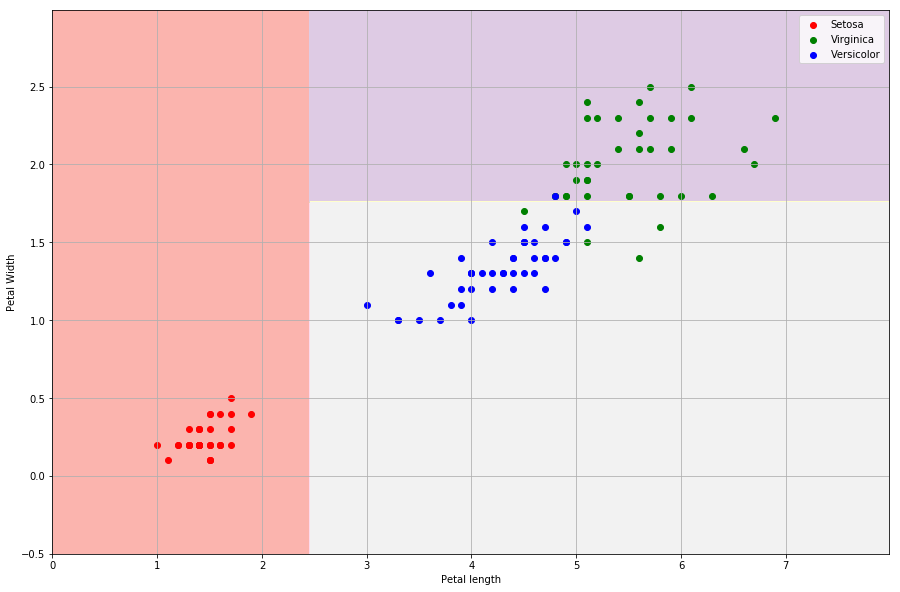

In [11]:
import numpy as np
x_min,x_max=0,8
y_min,y_max=-0.5,3

iris_setosa = x_train[y_train==0]
iris_virginica = x_train[y_train==1]
iris_versicolor = x_train[y_train==2]


xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))
print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]); # ravel converts list into a single series
yy_lin=yy.ravel(); print(yy_lin[:10]);
pred_input=np.c_[xx_lin,yy_lin]; print(pred_input[:20]) # combine both lists into set of one list

dectree=obtained_tree.predict(pred_input)
dectree=dectree.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy,dectree,cmap=plt.cm.Pastel1)
plt.scatter(iris_setosa['petal_length'],iris_setosa['petal_width'],color='r',label='Setosa')
plt.scatter(iris_virginica['petal_length'],iris_virginica['petal_width'],color='g',label='Virginica')
plt.scatter(iris_versicolor['petal_length'],iris_versicolor['petal_width'],color='b',label='Versicolor')
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()